# Plots for the following research questions:
* Number of stories created each year based on creation date?
* Average time to finish a story? Search for completed stories, take difference between modify and create date.
* Average number of parts per story (for completed stories)?
* Does length of read count correlate to a certain story length? Does read count correlate to number of parts per story?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
font={'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

In [3]:
plotdf=pd.read_csv('Data/stories_for_viz.csv')

In [4]:
#Pull Year from createDate and add as Year column
plotdf["year"]=""
plotdf["timediff"]=""
date=plotdf.at[0,"createDate"]
year=datetime.strptime(date,"%Y-%m-%dT%H:%M:%SZ").strftime("%Y")
for r in range(len(plotdf.index)):
    cdate=datetime.strptime(plotdf.at[r,"createDate"],"%Y-%m-%dT%H:%M:%SZ")
    mdate=datetime.strptime(plotdf.at[r,"modifyDate"],"%Y-%m-%dT%H:%M:%SZ")
    plotdf.at[r,"year"]=datetime.strftime(cdate,"%Y")
    plotdf.at[r,"timediff"]=(mdate-cdate).days
plotdf.head(2)


,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName,year,timediff
0,12050237,Hadar #Watty2014,"Fina is a Enforcers Daughter, she's been harsh...",https://www.wattpad.com/story/12050237-hadar-w...,2014-01-29T16:24:42Z,2015-01-27T10:47:41Z,True,37.0,False,407525.0,...,3.0,"['alpha', 'curse', 'luna', 'magic', 'power', '...",5187.0,2688905.0,106844.0,https://a.wattpad.com/useravatar/RevyRogue.128...,Reviana,RevyRogue,2014,362
1,42937930,❇awsome comebacks❇,yessss!!!!,https://www.wattpad.com/story/42937930-%E2%9D%...,2015-06-22T23:55:09Z,2015-08-16T08:07:12Z,True,16.0,False,2204.0,...,0.0,"['dumb', 'funny', 'listen', 'nothing', 'okay']",9738.0,1344254.0,37258.0,https://a.wattpad.com/useravatar/kittygirl_121...,NaN,kittygirl_121604,2015,54


## Number of Stories Created by Year

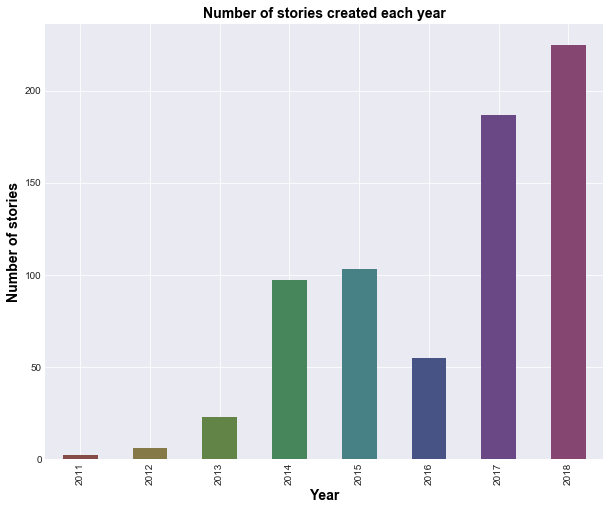

In [5]:
yeargroup=plotdf["id"].groupby(plotdf["year"]).count()
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
yeargroup.plot.bar(color=sns.hls_palette(8, l=.4, s=.3))
plt.title("Number of stories created each year",fontdict=font)
plt.xlabel("Year",fontdict=font)
plt.ylabel("Number of stories",fontdict=font)
plt.savefig('Images/Stories_Created_by_Year.png')
plt.show()

## Average Overall Time to Complete and Number of Chapters

In [15]:
completestories_df=plotdf.loc[(plotdf["completed"] ==True)]
avgtimetocomplete=round(completestories_df["timediff"].mean())
avgnumparts=round(completestories_df["numParts"].mean())
avgnumwords=round(completestories_df["length"].mean())
output=pd.DataFrame({"Average Time to Complete (days)":avgtimetocomplete,
                     "Average Number of Chapters":avgnumparts,
                     "Average Words":avgnumwords},index=[0])
output

,Average Number of Chapters,Average Time to Complete (days),Average Words
0,12,244.0,75265


## Time to Complete vs Popularity (Vote Count)

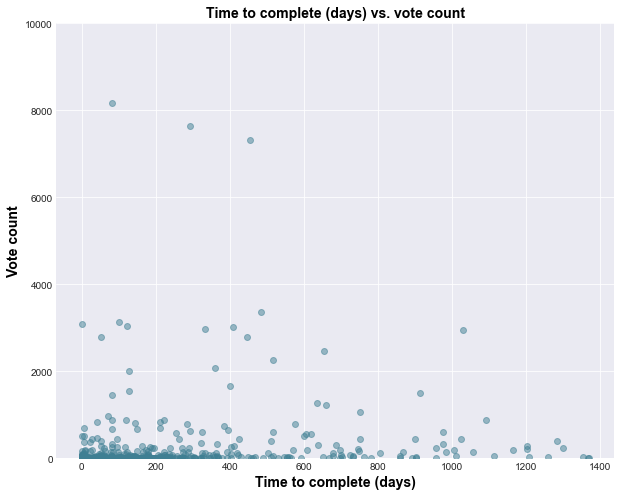

In [7]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["timediff"],plotdf["voteCount"],alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Time to complete (days) vs. vote count",fontdict=font)
plt.xlabel("Time to complete (days)",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.ylim(0,10000)
plt.show()

## Story Length vs. Popularity

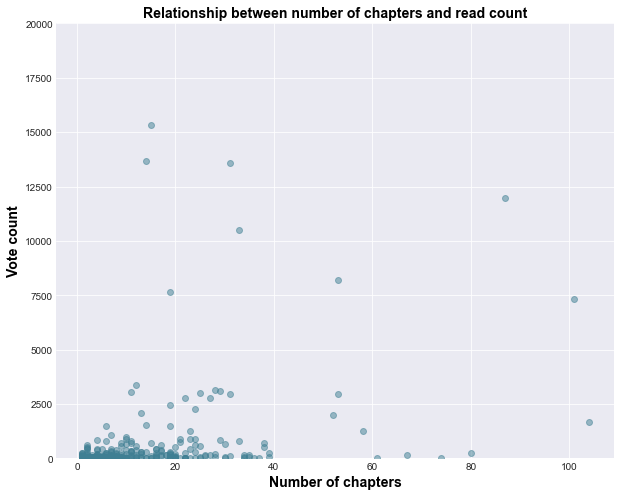

In [8]:
#readcount vs numparts
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["numParts"],plotdf["voteCount"],alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Relationship between number of chapters and read count",fontdict=font)
plt.xlabel("Number of chapters",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.ylim(0,20000)

plt.savefig('Images/StoryLength_VoteCount_chapters.png')
plt.show()

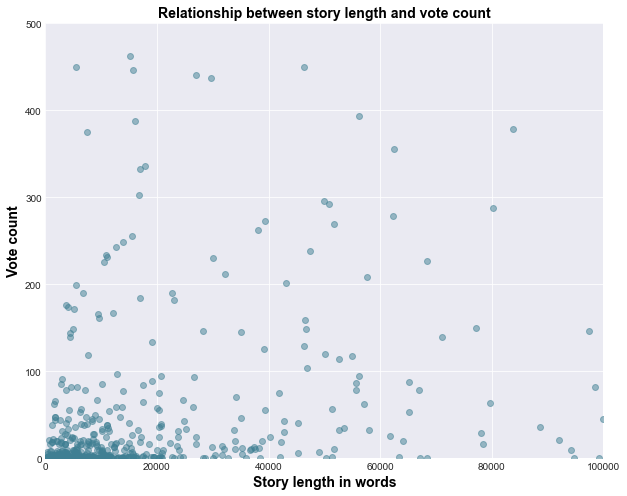

In [9]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["length"],plotdf["voteCount"], alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Relationship between story length and vote count",fontdict=font)
plt.xlabel("Story length in words",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.xlim(0,100000)
plt.ylim(0,500)
plt.savefig('Images/StoryLength_VoteCount_words')

plt.show()

## Number of Stories Published by User

In [10]:
storybyauthor=plotdf["id"].groupby(plotdf["userName"]).count()
plotdf.head(2)

,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName,year,timediff
0,12050237,Hadar #Watty2014,"Fina is a Enforcers Daughter, she's been harsh...",https://www.wattpad.com/story/12050237-hadar-w...,2014-01-29T16:24:42Z,2015-01-27T10:47:41Z,True,37.0,False,407525.0,...,3.0,"['alpha', 'curse', 'luna', 'magic', 'power', '...",5187.0,2688905.0,106844.0,https://a.wattpad.com/useravatar/RevyRogue.128...,Reviana,RevyRogue,2014,362
1,42937930,❇awsome comebacks❇,yessss!!!!,https://www.wattpad.com/story/42937930-%E2%9D%...,2015-06-22T23:55:09Z,2015-08-16T08:07:12Z,True,16.0,False,2204.0,...,0.0,"['dumb', 'funny', 'listen', 'nothing', 'okay']",9738.0,1344254.0,37258.0,https://a.wattpad.com/useravatar/kittygirl_121...,NaN,kittygirl_121604,2015,54


## Ratings

In [11]:
# mature=plotdf.loc[(plotdf["mature"]==True)]
maturecount=plotdf["id"].groupby(plotdf["mature"]==True).count()
maturecount

# nmature=plotdf.loc[(plotdf["mature"]==False)]

mature
False    698
Name: id, dtype: int64

In [28]:
ratings_group=plotdf["id"].groupby(plotdf["rating"]).count()

ratings_group=pd.DataFrame(ratings_group)
ratings_group

,id
rating,
0.0,348
1.0,250
2.0,6
3.0,94


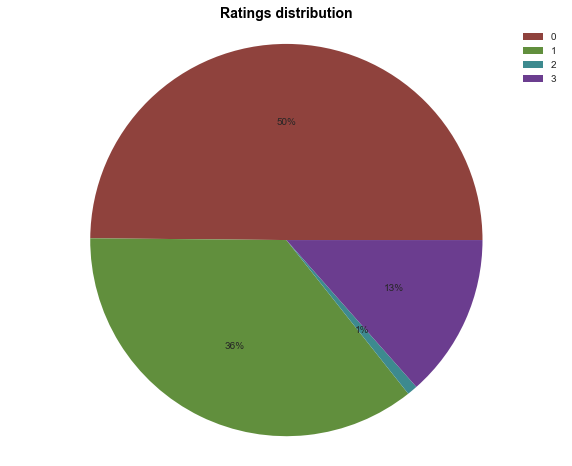

In [31]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.pie(ratings_group,colors=sns.hls_palette(4, l=.4, s=.4),autopct='%1.0f%%')
plt.legend(labels=[0,1,2,3])
plt.title("Ratings distribution",fontdict=font)
plt.axis('equal')
plt.savefig('Images/Ratings Distribution')

plt.show()

C:\Users\Andrea\Anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


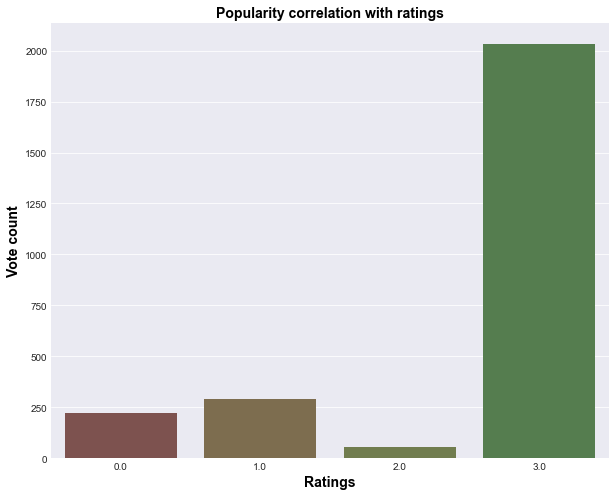

In [39]:
#story ranking vs vote count
votecount_ratings=plotdf["voteCount"].groupby(plotdf["rating"]).mean()
votecount_ratings=pd.DataFrame(votecount_ratings)
votecount_ratings=votecount_ratings.reset_index()
votecount_ratings
plt.figure(figsize=(10,8))
sns.barplot(x="rating", y="voteCount", data=votecount_ratings, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity correlation with ratings",fontdict=font)
plt.xlabel("Ratings",fontdict=font)
plt.ylabel("Vote count",fontdict=font)
plt.savefig('Images/Popularity_ratings')
plt.show()